In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
# Load the dataset
file_path = '/content/drive/MyDrive/Project /Final Projects/diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)

In [38]:
# Display the first few rows of the dataset
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [39]:
# Data preprocessing
X = data.drop('diabetes', axis=1)
y = data['diabetes']

In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

# Preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [42]:
# Create a pipeline for the Gradient Boosting model
model = GradientBoostingClassifier()
clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])

In [44]:
# Train the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [45]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [47]:
# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.97235
Precision: 0.9873417721518988
Recall: 0.6850117096018735
F1 Score: 0.8088489457310751
ROC AUC: 0.9792782712756015


In [48]:
# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



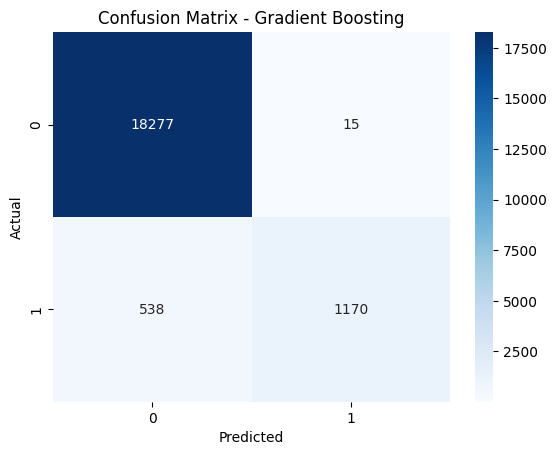

In [49]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

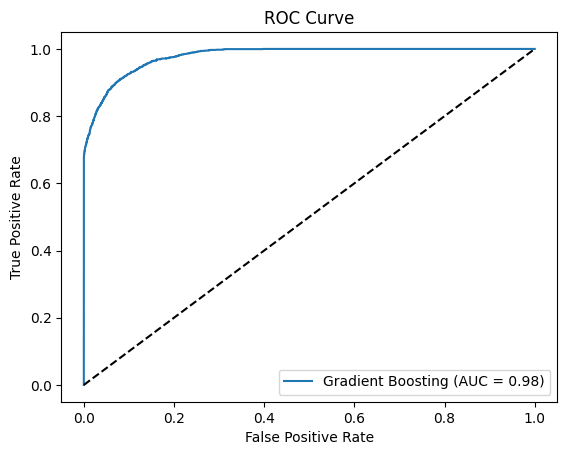

In [50]:
# Receiver Operating Characteristic Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [52]:
# Function to predict whether a person has diabetes based on input details
def predict_diabetes():
    details = {}
    for col in X.columns:
        if col in numerical_cols:
            details[col] = float(input(f'Enter {col}: '))
        else:
            details[col] = input(f'Enter {col} ({", ".join(X[col].unique())}): ')
    df_details = pd.DataFrame([details])
    prediction = clf.predict(df_details)
    return 'Diabetes' if prediction[0] == 1 else 'No Diabetes'

In [53]:
# Predict diabetes based on the input details
print(predict_diabetes())

Enter gender (Female, Male, Other): Female
Enter age: 50
Enter hypertension: 0
Enter heart_disease: 0
Enter smoking_history (never, No Info, current, former, ever, not current): never
Enter bmi: 22.8
Enter HbA1c_level: 5.8
Enter blood_glucose_level: 120
No Diabetes
